# K - means Clustering

## Imports

In [649]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

In [8]:
data = loadmat('./ex7/ex7data2.mat')

In [9]:
X = data['X']

In [10]:
X1 = X[:, 0:1]
X2 = X[:, 1:2]

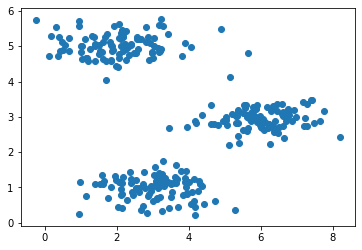

In [11]:
plt.scatter(X1, X2)

## Finding Closest Centroids

In [318]:
initial_centroids = np.array([(3,3), (6, 2), (8, 5)]);

In [319]:
def euclidean_distance(x1, x2, cx1, cx2):
    sq_diff = (cx1 - x1)**2 + (cx2 - x2)**2
    return np.sqrt(sq_diff)

In [322]:
def findClosestCentroids(X, centroids):
    x1, x2 = X[:, 0:1], X[:, 1:2]
    cx1, cx2 = centroids[:, 0], centroids[:, 1]
    distance = euclidean_distance(x1, x2, cx1, cx2)
    idx = np.argmin(distance, axis = 1)[:, None] + 1
    return idx

In [323]:
idx = findClosestCentroids(X, initial_centroids)
idx[:3]

array([[1],
       [3],
       [2]])

## Computing Centroid Means

In [324]:
def compute_centroid_means(X, idx, K = 3):
    centroids = []
    c = []
    
    for k in range(0, K):
        rows = (idx == k + 1)
        c.append(X[:, None][rows])
    
    for centroid in c:
        centroids.append(centroid.mean(0))
    
    return np.asarray(centroids), np.asarray(c)

## Plotting

In [325]:
initial_centroids

array([[3, 3],
       [6, 2],
       [8, 5]])

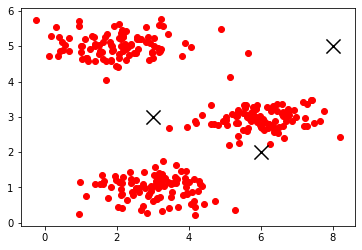

In [327]:
plt.scatter(X1, X2, color = 'r');
plt.scatter(x = initial_centroids[:, 0], y = initial_centroids[:, 1], 
            marker = 'x', color = 'k', s = 200)

In [402]:
centroids, c = compute_centroid_means(X, idx, 3);

In [378]:
def plotKMeans(c, centroids, ax, num):
    colors = ['r', 'g', 'b']
    
    for index, ci in enumerate(c):
        x1 = ci[:, 0:1]
        x2 = ci[:, 1:2]
        ax.scatter(x1, x2, color = colors[index])
    
    ax.scatter(x = centroids[:, 0], y = centroids[:, 1], 
                marker = 'x', color = 'k', s = 200, linewidths = 50)
    ax.set_title(f'Iteration No. {num}')

In [397]:
def plotKMeansNTimes(X, centroids, num_rows, num_cols):
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,25));
    
    num = 0
    for i in range(num_rows):
        for j in range(num_cols):
            idx = findClosestCentroids(X, centroids)
            centroids, c = compute_centroid_means(X, idx)
            plotKMeans(c, centroids, ax[i, j], num)
            num = num + 1

## Random Initialization

In [398]:
def random_init(X, K):
    centroids = []
    for k in range(K):
        random_idx = np.random.choice(len(X))
        centroid = X[random_idx, :]
        centroids.append(centroid)
    return np.asarray(centroids)

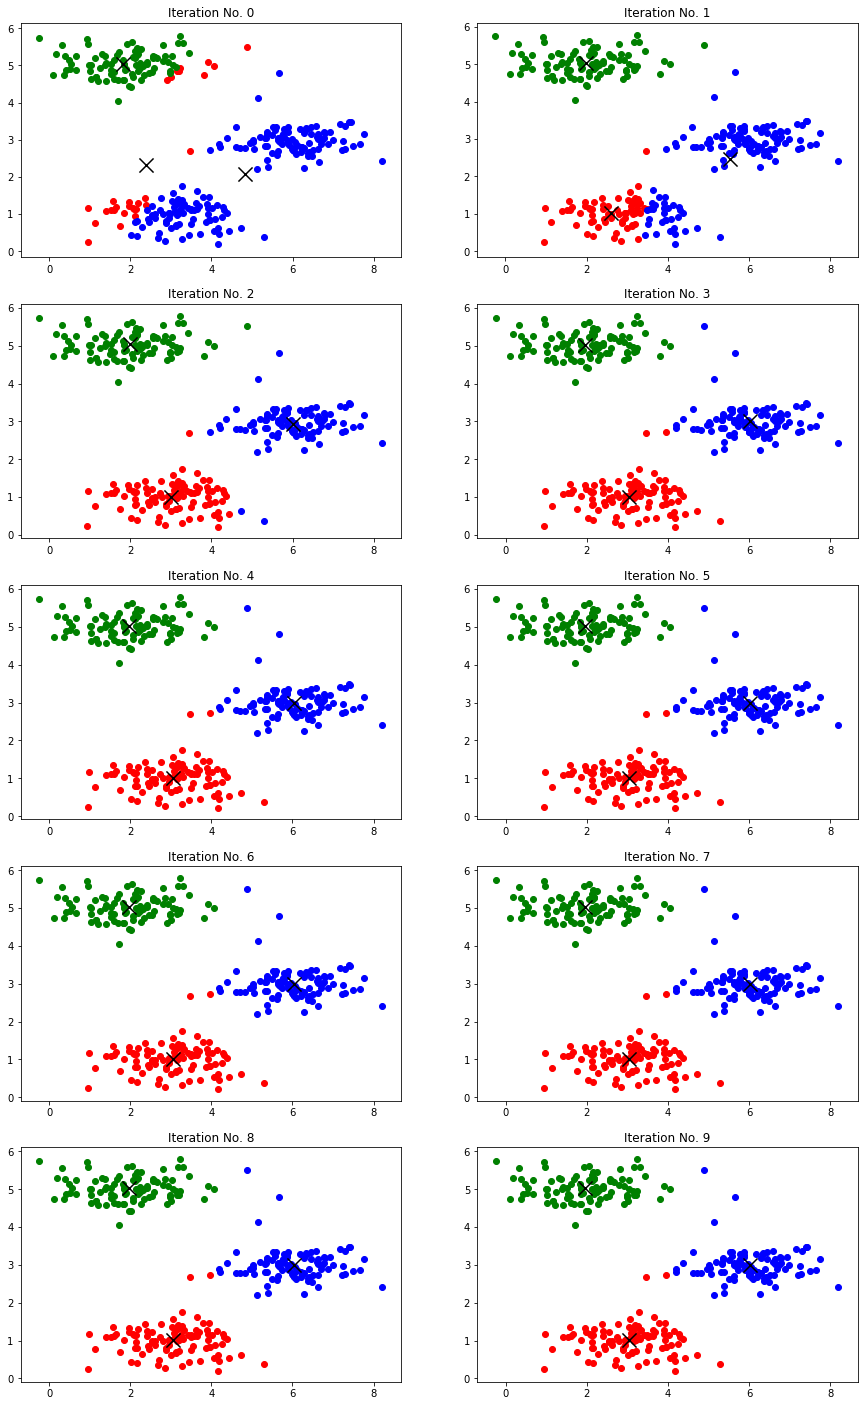

In [401]:
# Random Initialization of centroids

initial_centroids = random_init(X, 3);
plotKMeansNTimes(X, initial_centroids, 5, 2)

## Image Compression with K-means

In [420]:
img = Image.open('./ex7/bird_small.png');
img_array = np.array(img).reshape(-1, 3);
img_array.shape

(16384, 3)

### K-means on pixels

In [508]:
K = 16


In [559]:
def KMeans(centroids, data, num_iters, K):
    for n in range(num_iters):
        idx = findClosestCentroids(data, centroids)
        centroids, _ = compute_centroid_means(data, idx, K)
    return idx, centroids

In [568]:
def assignKMeansOnPixels(img, idx, centroids):
    img_recovered = np.zeros(img.shape)
    
    for index, row in enumerate(img_recovered):
        cluster = idx[index]
        new_color = centroids[cluster - 1]
        img_recovered[index] = new_color
    return img_recovered.astype(int)

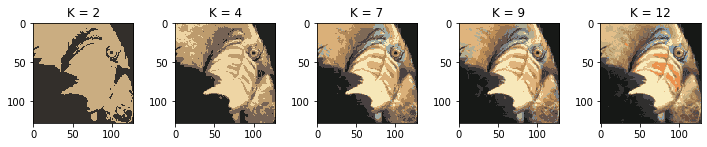

In [671]:
K = np.linspace(2, 12, 5)
num_K = len(K)
num_iters = 20
fig, axes = plt.subplots(1, 5, figsize = (10, 10))
plt.tight_layout()

for index, k in enumerate(K):
    initial_centroids = random_init(img_array, int(k));
    ax = axes[index]  
    
    idx, centroids = KMeans(initial_centroids, img_array, num_iters, int(k))
    img_recovered = assignKMeansOnPixels(img_array, idx, centroids)
    
    ax.imshow(img_recovered.reshape(128, -1, 3));
    ax.set_title(f'K = {int(k)}')

# Principal Component Analysis

You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

## Imports

In [701]:
from scipy.linalg import svd

In [873]:
data  = loadmat('./ex7/ex7data1.mat')

In [874]:
X = data['X']

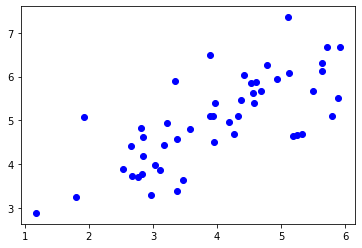

In [875]:
plt.scatter(X[:, 0], X[:, 1], marker = 'o', color = 'blue');

## Implementing PCA

1. Calculate covariance matrix
2. Use Singular Value Decomposition (SVD) to compute the eigenvectors U

In [876]:
def feature_normalize(X):
    mean = X.mean(0)
    std = X.std(0)
    
    X = (X - mean) / std
    return X

In [877]:
X = feature_normalize(X)

In [878]:
def covariance_matrix(X):
    m = len(X)
    sigma  = X.T @ X
    return sigma / m

In [879]:
sigma = covariance_matrix(X)

In [880]:
U, S, V = svd(sigma)

## Dimensionality Reduction with PCA

### Projecting the Data onto principal components

In [895]:
def projectData(X, U, K):
    U_reduce = U[:, 0:K]
    projection = X @ U_reduce
    return projection

In [896]:
Z = projectData(X, U, 1)
Z.shape

(50, 1)

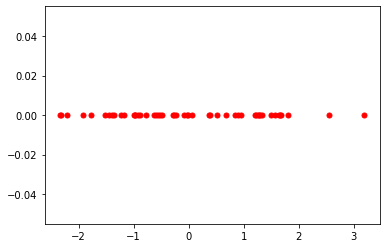

In [782]:
plt.plot(Z, np.zeros(len(Z)), color='red', marker='o', linestyle='none',
    linewidth=1, markersize=5);

### Reconstructing an approximation of the data

In [916]:
U[1]

array([-0.70710678,  0.70710678])

In [924]:
def recoverData(Z, U, K):
    U_recover = U[:, :K - 1]
    X_rec = Z @ U_recover.reshape(1, -1)
    return X_rec

In [925]:
X_rec = recoverData(Z, U, 2)

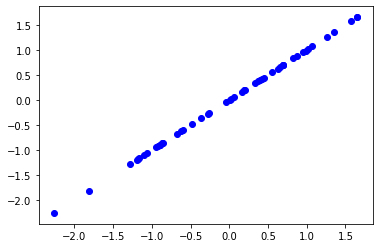

In [927]:
plt.scatter(X_rec[:, 0], X_rec[:, 1], marker = 'o', color = 'blue');

## Face Image Dataset

In [928]:
data = loadmat('./ex7/ex7faces.mat')

In [929]:
X = data['X'].reshape(5000, 1024)
X.shape

(5000, 1024)

In [930]:
n_images = 100
random_idx = np.random.choice(len(X), 100)
random_faces = X[random_idx,:]

random_faces.shape

(100, 1024)

In [1003]:
def plot_faces(num_rows, num_cols, data, h, w):
    fig, axes = plt.subplots(num_cols, num_rows, sharex='col', sharey='row', figsize = (10,10))
    axes = axes.flatten()
    plt.tight_layout()
    for index, row in enumerate(data):
        face = row.reshape(h, w, order = 'F')
        ax = axes[index]
        ax.imshow(face, cmap = 'gray')
        ax.axis('off')

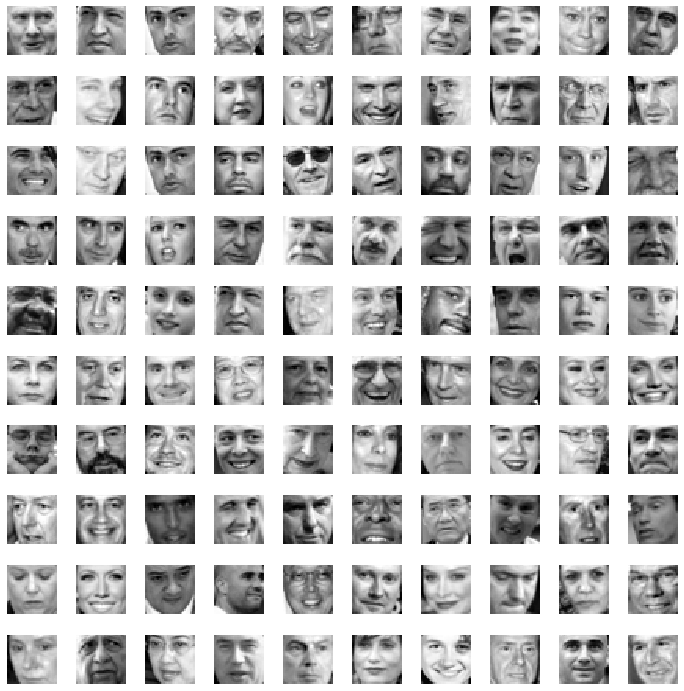

In [1004]:
plot_faces(10, 10, random_faces, h = 32, w = 32)

## PCA on Faces

## Dimensionality Reduction

In [1005]:
X_norm = feature_normalize(random_faces)
sigma = covariance_matrix(X_norm)
U, S, V = svd(sigma)

In [1006]:
Z = projectData(X_norm, U, K = 100)

In [1007]:
Z.shape

(100, 100)

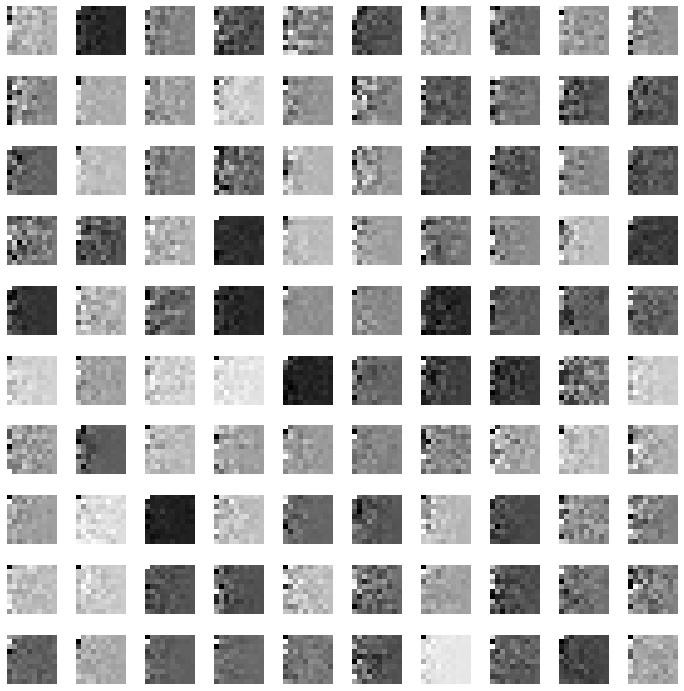

In [1009]:
plot_faces(10, 10, Z, h = 10, w = 10)

### Recover Faces

In [1010]:
Z.shape

(100, 100)

In [1011]:
def recoverData(Z, U, K):
    U_recover = U[:, :K].T
    X_rec = Z @ U_recover
    return X_rec

In [1012]:
X_rec = recoverData(Z, U, 100)

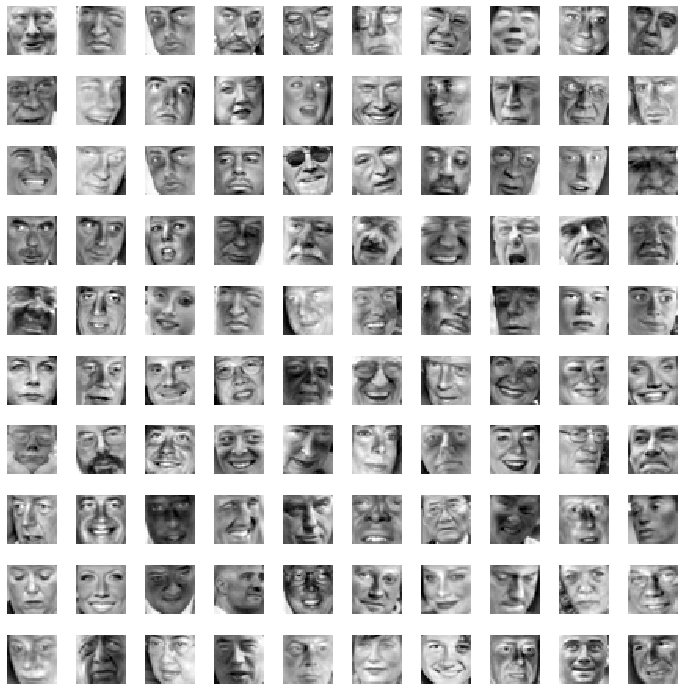

In [1013]:
plot_faces(10, 10, X_rec, h = 32, w = 32)